In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

In [2]:
data=pd.read_parquet('data.parquet')

In [23]:
data["missing"].apply(len).unique()

array([0])

In [20]:
string=data[data["n_slices"]==1][data["threshold"]==0.2].drop("n_slices",axis=1).to_latex()

/tmp/ipykernel_13946/2330784593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  string=data[data["n_slices"]==1][data["threshold"]==0.2].drop("n_slices",axis=1).to_latex()
/tmp/ipykernel_13946/2330784593.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=data[data["n_slices"]==1][data["threshold"]==0.2].drop("n_slices",axis=1).to_latex()


In [22]:
print(string)

\begin{tabular}{lrrrrl}
\toprule
{} &  threshold &  n\_workers &  spark\_time &  seq\_time & missing \\
\midrule
0  &        0.2 &          1 &   21.631669 &  0.051736 &      [] \\
3  &        0.2 &          2 &   13.244916 &  0.051758 &      [] \\
6  &        0.2 &          4 &    9.117023 &  0.054447 &      [] \\
9  &        0.2 &          6 &    9.633517 &  0.052234 &      [] \\
12 &        0.2 &          8 &    9.452828 &  0.068206 &      [] \\
15 &        0.2 &         12 &   10.674502 &  0.054711 &      [] \\
18 &        0.2 &         16 &   11.627685 &  0.053046 &      [] \\
\bottomrule
\end{tabular}



In [7]:
data["missing"].apply(len).unique()

array([0])

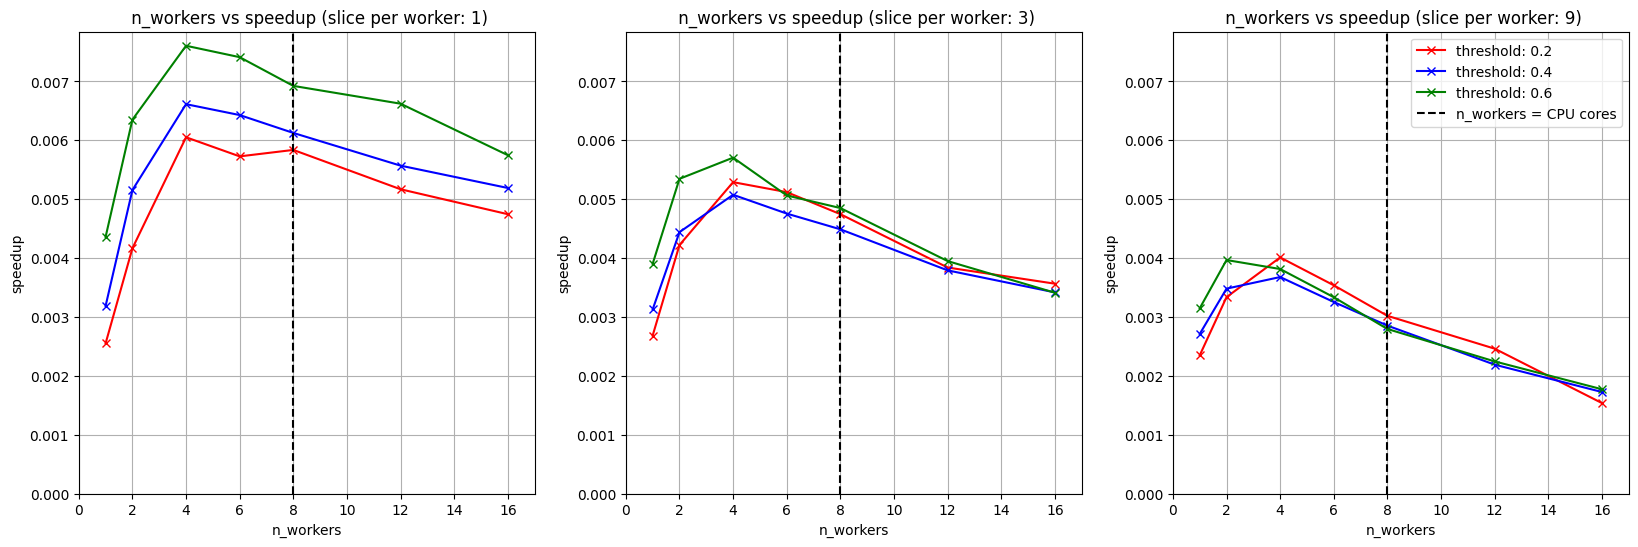

In [11]:
fig,axs=plt.subplots(1,3,figsize=(20,6))

#axs0=[item for sublist in axs for item in sublist]

for ax,(s) in zip(axs,data["n_slices"].unique()):

        ax.set_title(" n_workers vs speedup (slice per worker: "+str(s)+")")

        ax.set_xlim(0, data["n_workers"].max()+1)
        ax.set_ylim(0, (data["seq_time"].mean()/data["spark_time"]).max())
        
        ax.set_xlabel("n_workers")
        ax.set_ylabel("speedup")

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        for t,c in zip(data["threshold"].unique(),["red","blue","green"]):
                
                ax.plot(data[(data.n_slices == s) & (data.threshold == t)]["n_workers"],
                        (data[(data.n_slices == s) & (data.threshold == t)]["seq_time"].mean()/data[(data.n_slices == s) & (data.threshold == t)]["spark_time"]),
                        #data[(data.n_slices == s) & (data.threshold == t)]["spark_time"],
                        '-x', color=c, label="threshold: "+str(t))

        
        line = mlines.Line2D([8, 8], [0, (data["seq_time"].mean()/data["spark_time"]).max() ], color='black',linestyle="dashed",label="n_workers = CPU cores")
        ax.add_line(line)
        
        ax.grid()
        
        handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.90, 0.88))

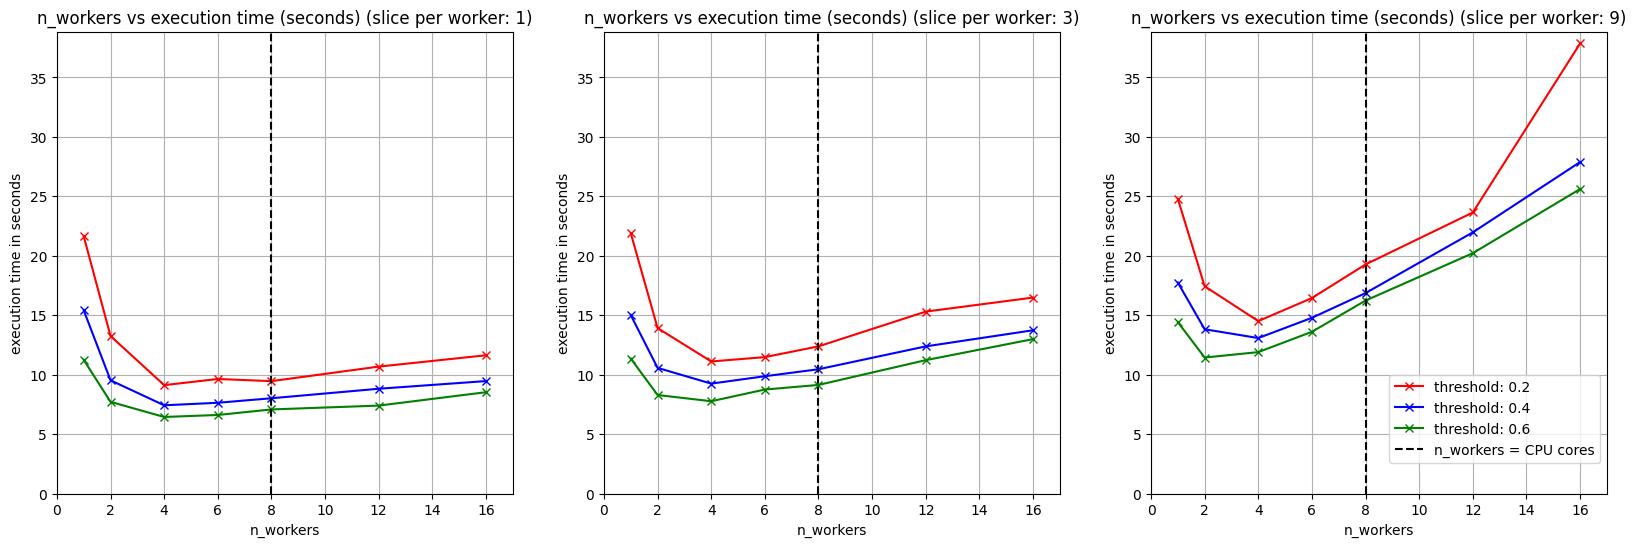

In [12]:
fig,axs=plt.subplots(1,3,figsize=(20,6))

#axs0=[item for sublist in axs for item in sublist]

for ax,(s) in zip(axs,data["n_slices"].unique()):

        ax.set_title("n_workers vs execution time (seconds) (slice per worker: "+str(s)+")")

        ax.set_xlim(0, data["n_workers"].max()+1)
        ax.set_ylim(0, (data["spark_time"]).max()+1)
        
        ax.set_xlabel("n_workers")
        ax.set_ylabel("execution time in seconds")

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        for t,c in zip(data["threshold"].unique(),["red","blue","green"]):
                
                ax.plot(data[(data.n_slices == s) & (data.threshold == t)]["n_workers"],
                        data[(data.n_slices == s) & (data.threshold == t)]["spark_time"],
                        '-x', color=c, label="threshold: "+str(t))
                
        line = mlines.Line2D([8, 8], [0, (data["spark_time"]).max() +1 ], color='black',linestyle="dashed",label="n_workers = CPU cores")
        ax.add_line(line)
        
        ax.grid()
        
        handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc="lower right", bbox_to_anchor=(0.90, 0.15))